In [86]:
import os
import json
import pandas as pd
import numpy as np


columns = [
    'CONFESSION',
    'CIR_TYPE_WEP', 
    'CIR_HELD_WAY_WEP', 
    'CIR_AMMU_AMOUNT_WEP',
    'CIR_PURPOSE',
    'GENERAL_CIRCUM',
    'CIR_STATUS_WEP',
    'REGRET',
    'PUNISHMENT',
    'CIR_PLANNING',
    'RESPO',
    'CIR_OBTAIN_WAY_WEP', 
    'CIR_USE',
    'CIRCUM_OFFENCE'
]
path = '/home/tak/MOJ/results/evaluations/weapon/sentence_classification/04_17_more_cases'
predictions_no_clf = {}
FF = ['first_labels','second_labels']
for folder in os.listdir(path):
    if folder in FF:
        for label in os.listdir(os.path.join(path, folder)):
            if label in columns:
                for model in os.listdir(os.path.join(path, folder,label)):
                    if model == 'dictabert':
                        for file in os.listdir(os.path.join(path, folder,label, model)):
                            if file.endswith('.json'):
                                with open(os.path.join(path, folder,label, model, file)) as f:
                                    data = json.load(f)
                                    #remove bestthreshold key from dict
                                    if 'best_threshold' in data:
                                        data.pop('best_threshold')
                                    predictions_no_clf[label] = data

path = '/home/tak/MOJ/results/evaluations/weapon/sentence_classification/04_19_regular_cases'
predictions_with_clf = {}

for folder in os.listdir(path):
    if folder in FF:
        for label in os.listdir(os.path.join(path, folder)):
            if label in columns:
                for model in os.listdir(os.path.join(path, folder,label)):
                    if model == 'dictabert':
                        for file in os.listdir(os.path.join(path, folder,label, model)):
                            if file.endswith('.json'):
                                with open(os.path.join(path, folder,label, model, file)) as f:
                                    data = json.load(f)
                                    #remove bestthreshold key from dict
                                    if 'best_threshold' in data:
                                        data.pop('best_threshold')
                                    predictions_with_clf[label] = data
 
path = '/home/tak/MOJ/results/evaluations/weapon/sentence_classification/03_31_din_12_cases'
predictions_ground_truth = {}

for folder in os.listdir(path):
    if folder in FF:
        for label in os.listdir(os.path.join(path, folder)):
            if label in columns:
                for model in os.listdir(os.path.join(path, folder,label)):
                    if model == 'dictabert':
                        for file in os.listdir(os.path.join(path, folder,label, model)):
                            if file.endswith('.json'):
                                with open(os.path.join(path, folder,label, model, file)) as f:
                                    data = json.load(f)
                                    #remove bestthreshold key from dict
                                    if 'best_threshold' in data:
                                        data.pop('best_threshold')
                                    predictions_ground_truth[label] = data

In [26]:
predictions_ground_truth.keys()

dict_keys(['GENERAL_CIRCUM', 'PUNISHMENT', 'CIR_STATUS_WEP', 'CIR_HELD_WAY_WEP', 'CIR_PURPOSE', 'CIR_AMMU_AMOUNT_WEP', 'CIR_OBTAIN_WAY_WEP', 'CIR_TYPE_WEP', 'CIR_USE', 'CIR_PLANNING', 'RESPO', 'REGRET', 'CONFESSION'])

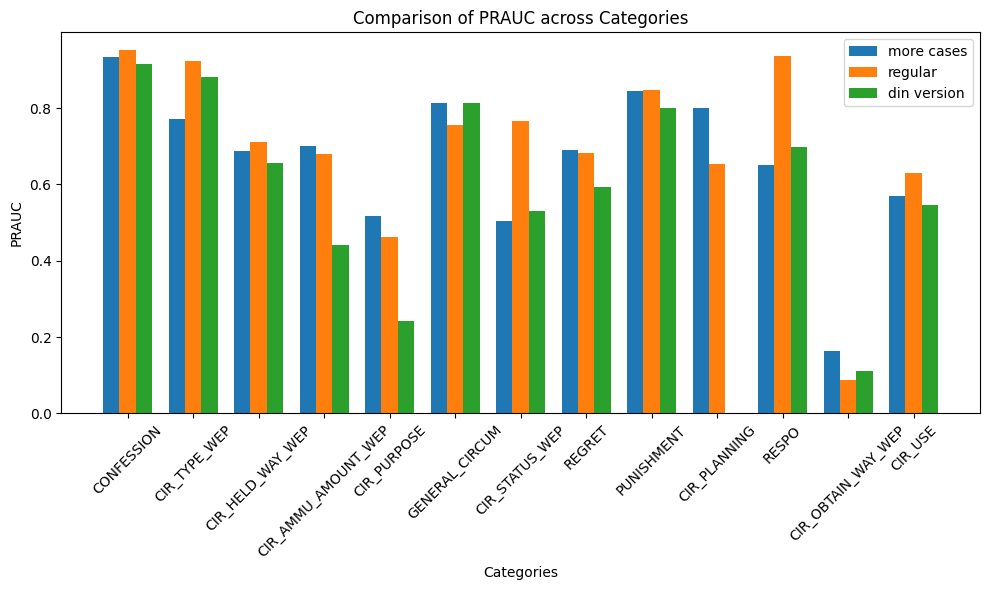

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_no_clf, df_with_clf, and df_ground_truth were created as follows:
df_no_clf = pd.DataFrame.from_dict(predictions_no_clf, orient='index')
df_with_clf = pd.DataFrame.from_dict(predictions_with_clf, orient='index')
df_ground_truth = pd.DataFrame.from_dict(predictions_ground_truth, orient='index')

# Combine the DataFrames into one with a MultiIndex for columns
df_all = pd.concat([df_no_clf, df_with_clf, df_ground_truth],
                   axis=1,
                   keys=['more cases','regular', 'din version'])

ordered_folders = [
    'CONFESSION',
    'CIR_TYPE_WEP', 
    'CIR_HELD_WAY_WEP', 
    'CIR_AMMU_AMOUNT_WEP',
    'CIR_PURPOSE',
    'GENERAL_CIRCUM',
    'CIR_STATUS_WEP',
    'REGRET',
    'PUNISHMENT',
    'CIR_PLANNING',
    'RESPO',
    'CIR_OBTAIN_WAY_WEP', 
    'CIR_USE',
    'CIRCUM_OFFENCE'
]
# Ensure that you only select the rows that exist
ordered_folders = [folder for folder in ordered_folders if folder in df_no_clf.index]

df_no_clf = df_no_clf.loc[ordered_folders]
df_with_clf = df_with_clf.loc[ordered_folders]
df_ground_truth = df_ground_truth.loc[ordered_folders]

# Then combine them
df_all = pd.concat([df_no_clf, df_with_clf, df_ground_truth],
                   axis=1,
                   keys=['more cases','regular', 'din version'])
# Display the combined DataFrame (optional)
# print(df_all)

# Get a list of the metric names from one of the sub-dataframes
metrics = df_all['more cases'].columns
# metrics = ['precision', 'recall', 'f1', 'f2', 'PRAUC']
metrics = ['PRAUC']

folders = df_all.index.tolist()

# Loop over each metric and create a grouped bar chart
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Set up the positions of the bars on the x-axis
    indices = np.arange(len(folders))
    width = 0.25  # width of each bar
    
    # Plot each set of predictions as bars
    plt.bar(indices - width, df_all['more cases'][metric], width=width, label='more cases')
    plt.bar(indices, df_all['regular'][metric], width=width, label='regular')
    plt.bar(indices + width, df_all['din version'][metric], width=width, label='din version')
    
    # Labeling the graph
    plt.xlabel("Categories")
    plt.ylabel(metric)
    plt.title(f"Comparison of {metric} across Categories")
    plt.xticks(indices, folders, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [80]:
import pandas as pd
import numpy as np
import os

path = '/home/tak/MOJ/resources/data/tagging/drugs/gt/evaluation_statistic'
sheet_texts = {}

for file in os.listdir(path):
    f = file.split('.')
    t = f[0].split('tagging150_')
    sheet_name = t[1]
    if sheet_name == 'PUNISHMENT':
        sheet_name = 'CIR_PUNISHMENT'
    xls = pd.read_excel(os.path.join(path, file), sheet_name=None)
    for sheet_names, df in xls.items():
        filtered_df = df[(df.iloc[:, 1] == 1) & (df.iloc[:, 2] == 1)]
        values_in_b = filtered_df.iloc[:,0].astype(str).tolist()
        # print(values_in_b)
    
        sheet_texts[sheet_name] = values_in_b

all_texts = sorted(set(text for texts in sheet_texts.values() for text in texts))
# print(all_texts)
presence_df = pd.DataFrame({'text': all_texts})
for sheet_name in sheet_texts:
    presence_df[sheet_name] = presence_df['text'].apply(lambda x: 1 if x in sheet_texts[sheet_name] else 0)

# Show the final DataFrame
ddd = pd.read_csv('/home/tak/MOJ/resources/data/tagging/drugs/gt/combined_output.csv')
columns_to_delete = ['verdict', 'reject', 'CIRCUM_OFFENSE']
for col in columns_to_delete:
    if col in ddd.columns:
        ddd.drop(col, axis=1, inplace=True)

# add the rows from presence_df to ddd
for index, row in presence_df.iterrows():
    text = row['text']
    if text in ddd['text'].values:
        ddd.loc[ddd['text'] == text, sheet_name] = row[sheet_name]
    else:
        new_row = pd.Series(row)
    ddd = pd.concat([ddd, new_row.to_frame().T], ignore_index=True)
# Save the updated DataFrame to a new CSV file
ddd.to_csv('/home/tak/MOJ/resources/data/tagging/drugs/gt/combined_output_with_tags.csv', index=False)


In [ ]:
path = '/home/tak/MOJ/results/db/drugs_docx'
count = 0
import os
for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            if file.endswith('.json'):
                count += 1
print(count)

In [16]:
path = '/home/tak/MOJ/results/evaluations/drugs/features_extraction/final_table.csv'
import pandas as pd
import numpy as np
import os

df = pd.read_csv(path)
cir_type = df['CIR_TYPE'].tolist()
#remove float from cir_type
for i in range(len(cir_type)):
    if isinstance(cir_type[i], float):
        cir_type[i] = ""
#get only words from cir_type with regex
for i in range(len(cir_type)):
    if isinstance(cir_type[i], str):
        cir_type[i] = cir_type[i].replace("[", "").replace("]", "").replace("'", "").replace('"', "").replace(",","").replace(".","")
all_types =[]
for i in range(len(cir_type)):
    text = cir_type[i]
    #split the text into words
    words = text.split()
    #remove duplicates
    unique_words = set(words)
    #add the unique words to the list
    all_types.extend(unique_words)
# Count the occurrences of each word
word_counts = {}
for word in all_types:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1
# Sort the dictionary by value in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
# Print the sorted word counts
# for word, count in sorted_word_counts:
#     print(f"{word}: {count}")

print(list(set(all_types)))

['amb-fub', 'GHB', 'החומר', 'קאטמין', 'מטילמטאקטינון', 'מסקלין', 'AMB-FUM', 'P-METHYLMETHCATHINONE', 'CHIMINACA-AB', 'ALFA-PVP', 'AB-FUBINACA', 'בופרנורין', 'נייס', 'Methy', 'קנאביס', 'METHAMPHETAMINE', 'קנביס/חשיש', 'מתאמפטמין', 'ADB-5F', 'MDMB-Butinaca-4F', 'קוקאין', 'הידרו', '5F-AMB', '5F', 'אמפטמין', 'Dimethlmethcathinone', 'מטדון', 'UR144', 'דאב', 'Phenethylamines', 'm-methylmethcathinone', 'Pentedrone', '22-PB-F5', 'DIMETHOXYPPHENETHYLAMINE', 'methyimthcathinonc', 'AMB-FUB', 'm-', 'FENTANYLUM', 'דוסה', 'Alfa-PVP', 'קנאבוס', 'F5-ADB', 'N-Ethylpentylone', 'קודאין', 'קאתינון', 'MDMA', 'קנביס', 'BUTANEDIOL', 'FUB-AMB', 'AB-CHIMINACA', 'AMB-F5', 'בופרנורפין', 'METHAMPHETAMIN', 'm-METHYLMETHCATHINONE', 'AB-CHMINACA', 'ketamine', 'מתקאתינון', 'AM2201', 'MDMB-4en-PINACA', 'MMC', 'מתאמפטאמין', 'JWH-210', 'דיאםטי', 'דימתילטריפטאמין', 'מתיאמפטמין', 'מת\\\\אמפטמין', 'אלפא', 'MDMB-4EN-PINACA', 'MethylMethCathinone-m', 'MDPV', 'AMB-5F', 'הרואין', 'MDMB-4en', 'ALFA-PVT', 'ADB', 'OXYCODONE', 'פס

In [18]:
path = '/home/tak/MOJ/results/evaluations/drugs/features_extraction/final_table.csv'
import pandas as pd
import numpy as np
import os

df = pd.read_csv(path)

df['year'] = df['Date'].apply(lambda x: 2000 + int(x.split('/')[2]))

df['age'] = df['year'] - df['age']
df


AttributeError: 'float' object has no attribute 'split'